In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/malaria-in-africa/DatasetAfricaMalaria.csv


In [2]:
#import dataset
path = '/kaggle/input/malaria-in-africa/DatasetAfricaMalaria.csv'
df = pd.read_csv(path)

In [3]:
df.head(5)

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)


In [4]:
#shape of data
df.shape

(594, 27)

In [5]:
df.dtypes

Country Name                                                                                object
Year                                                                                         int64
Country Code                                                                                object
Incidence of malaria (per 1,000 population at risk)                                        float64
Malaria cases reported                                                                     float64
Use of insecticide-treated bed nets (% of under-5 population)                              float64
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    float64
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      float64
People using safely managed drinking water services (% of population)                      float64
People using safely managed drinking water services, rural (% of rural population)         float64
People usi

In [6]:
#convert year to date time 
from datetime import datetime

df['Year'] = pd.to_datetime(df.Year,format='%Y')

df.dtypes

Country Name                                                                                       object
Year                                                                                       datetime64[ns]
Country Code                                                                                       object
Incidence of malaria (per 1,000 population at risk)                                               float64
Malaria cases reported                                                                            float64
Use of insecticide-treated bed nets (% of under-5 population)                                     float64
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)           float64
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)             float64
People using safely managed drinking water services (% of population)                             float64
People using safely managed drinking water ser

In [7]:
#import regular packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#import the plotly packages
import plotly.offline as py
from plotly import tools
import plotly.graph_objs as go
import plotly.express as px

In [9]:
#Malaria data for plotting
Malaria_data = df[['Country Name','Year','Country Code','Incidence of malaria (per 1,000 population at risk)','Malaria cases reported','Use of insecticide-treated bed nets (% of under-5 population)','Children with fever receiving antimalarial drugs (% of children under age 5 with fever)','Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)','latitude','longitude','geometry']]

In [10]:
Malaria_data.dtypes

Country Name                                                                                       object
Year                                                                                       datetime64[ns]
Country Code                                                                                       object
Incidence of malaria (per 1,000 population at risk)                                               float64
Malaria cases reported                                                                            float64
Use of insecticide-treated bed nets (% of under-5 population)                                     float64
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)           float64
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)             float64
latitude                                                                                          float64
longitude                                     

In [11]:
#convert year to string
Malaria_data.Year = Malaria_data.Year.astype(str)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
#Incidence of Malaria at risk
fig1 = px.choropleth(Malaria_data,locations=Malaria_data['Country Code'],color=Malaria_data['Incidence of malaria (per 1,000 population at risk)'],color_continuous_scale='Blues',locationmode='ISO-3',scope='africa',animation_frame=Malaria_data['Year'],title="Incidence of Malaria at risk in Africa",labels={'color':'Incidence of Malaria'})

fig1.show()

In [13]:
#Malaria Cases Reported by country
fig2 = px.choropleth(Malaria_data,locations=Malaria_data['Country Code'],color=Malaria_data['Malaria cases reported'],color_continuous_scale='Blues',locationmode='ISO-3',scope='africa',animation_frame=Malaria_data['Year'],title="Malaria Cases in Africa",labels={'color':'number of Malaria cases'})

fig2.show()

In [14]:
#Use of insecticide-treated bed nets
fig3 = px.choropleth(Malaria_data,locations=Malaria_data['Country Code'],color=Malaria_data['Use of insecticide-treated bed nets (% of under-5 population)'],color_continuous_scale='Blues',locationmode='ISO-3',scope='africa',animation_frame=Malaria_data['Year'],title="Malaria in Africa: Use of Insecticide-treated Bed Nets",labels={'color':'Use of insecticide-treated bed nets'})

fig3.show()

In [15]:
#Children with fever receiving antimalarial drugs (% of children under age 5 with fever)
fig4 = px.choropleth(Malaria_data,locations=Malaria_data['Country Code'],color=Malaria_data['Children with fever receiving antimalarial drugs (% of children under age 5 with fever)'],color_continuous_scale='Blues',locationmode='ISO-3',scope='africa',animation_frame=Malaria_data['Year'],title="Malaria in Africa: Children with Fever receiving Antimalarial Drugs",labels={'color':'Children with fever receiving antimalarial drugs'})

fig4.show()

In [16]:
#Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women) 
fig5 = px.choropleth(Malaria_data,locations=Malaria_data['Country Code'],color=Malaria_data['Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)'],color_continuous_scale='Blues',locationmode='ISO-3',scope='africa',animation_frame=Malaria_data['Year'],title="Malaria in Africa: Intermittent Preventive Treatment of Malaria in Pregnancy",labels={'color':'Intermittent preventive treatment (IPT) of malaria in pregnancy'})

fig5.show()

In [17]:
#some more data exploreation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 27 columns):
 #   Column                                                                                   Non-Null Count  Dtype         
---  ------                                                                                   --------------  -----         
 0   Country Name                                                                             594 non-null    object        
 1   Year                                                                                     594 non-null    datetime64[ns]
 2   Country Code                                                                             594 non-null    object        
 3   Incidence of malaria (per 1,000 population at risk)                                      550 non-null    float64       
 4   Malaria cases reported                                                                   550 non-null    float64       
 5   Use of insectic

In [18]:
df.describe()

,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),"People using safely managed sanitation services, rural (% of rural population)",...,Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude
count,550.000000,5.500000e+02,132.000000,122.000000,106.000000,99.000000,88.000000,176.000000,132.000000,110.000000,...,588.000000,588.000000,588.000000,566.000000,566.000000,588.000000,566.000000,566.000000,594.000000,594.000000
mean,190.087491,1.068330e+06,42.530303,30.201639,15.013958,33.478990,12.470568,51.549545,28.768939,14.361727,...,43.164116,3.523061,65.994915,51.449576,84.268498,39.469796,28.077208,48.088375,2.828796,17.342546
std,163.054527,2.192802e+06,20.157059,18.903198,12.389166,26.678321,10.078371,24.157416,18.631510,7.088038,...,18.086118,1.456244,17.283361,18.927868,9.307285,26.304934,24.046725,21.802128,15.678226,20.041257
min,0.000000,0.000000e+00,1.000000,0.500000,0.000000,5.770000,0.930000,11.200000,6.370000,2.300000,...,9.860000,-4.650000,28.960000,17.050000,52.010000,4.990000,1.890000,12.580000,-30.559482,-24.013197
25%,30.857500,2.211750e+03,26.675000,17.275000,5.763285,8.975000,4.185000,34.125000,16.532500,7.200000,...,28.795000,2.512500,52.375000,37.075000,78.080000,18.197500,8.842500,30.775000,-6.369028,0.824782
50%,174.775000,1.130260e+05,42.900000,29.300000,11.500000,28.390000,10.675000,51.365000,25.410000,15.950000,...,41.560000,3.730000,64.470000,50.435000,85.420000,32.555000,18.815000,44.695000,6.744051,18.611308
75%,347.637500,1.154808e+06,56.325000,42.625000,21.850000,43.890000,16.887500,70.747500,35.725000,20.315000,...,56.945000,4.450000,79.165000,62.245000,90.082500,54.810000,38.082500,58.845000,12.862807,31.465866
max,585.540000,1.682113e+07,95.500000,76.900000,59.600000,92.660000,39.930000,89.540000,78.120000,25.540000,...,88.980000,7.400000,99.870000,99.830000,99.920000,100.000000,95.180000,98.300000,33.886917,57.552152


In [19]:
#unique years
df.Year.unique()

array(['2007-01-01T00:00:00.000000000', '2008-01-01T00:00:00.000000000',
       '2009-01-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000', '2012-01-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [20]:
#unique countries
df['Country Name'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
       'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       "Cote d'Ivoire", 'Djibouti', 'Egypt, Arab Rep.',
       'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon',
       'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya',
       'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia',
       'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
       'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
       'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda',
       'Zambia', 'Zimbabwe'], dtype=object)

In [21]:
#the length of the dataset
length_dataset = len(df)
print(length_dataset)

594


In [22]:
#count the missing values for each column
missing_values_count = df.isnull().sum()
print(missing_values_count)

Country Name                                                                                 0
Year                                                                                         0
Country Code                                                                                 0
Incidence of malaria (per 1,000 population at risk)                                         44
Malaria cases reported                                                                      44
Use of insecticide-treated bed nets (% of under-5 population)                              462
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    472
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      488
People using safely managed drinking water services (% of population)                      495
People using safely managed drinking water services, rural (% of rural population)         506
People using safely managed drinking water service

In [23]:
#count missing values for malaria cases reported per year
df['Malaria cases reported'].isnull().groupby(df['Year']).sum()

Year
2007-01-01    4
2008-01-01    4
2009-01-01    4
2010-01-01    4
2011-01-01    4
2012-01-01    4
2013-01-01    4
2014-01-01    4
2015-01-01    4
2016-01-01    4
2017-01-01    4
Name: Malaria cases reported, dtype: int64

In [24]:
#drop countries with missing values for no incidence of Malaria
new_malaria_data_v1 = df[df['Incidence of malaria (per 1,000 population at risk)'].notna()]
new_malaria_data_v1 = new_malaria_data_v1[new_malaria_data_v1['Incidence of malaria (per 1,000 population at risk)'] != 0]
print(new_malaria_data_v1.head(5))

#also drop countries with missing values or null values for malaria cases reported (after dropping no incidence of malaria)
new_malaria_data_v2 = df[df['Malaria cases reported'].notna()]
new_malaria_data_v2 = new_malaria_data_v2[new_malaria_data_v2['Malaria cases reported'] != 0]
print(new_malaria_data_v2.head(5))

   Country Name       Year Country Code  \
0       Algeria 2007-01-01          DZA   
1        Angola 2007-01-01          AGO   
2         Benin 2007-01-01          BEN   
3      Botswana 2007-01-01          BWA   
4  Burkina Faso 2007-01-01          BFA   

   Incidence of malaria (per 1,000 population at risk)  \
0                                               0.01     
1                                             286.72     
2                                             480.24     
3                                               1.03     
4                                             503.80     

   Malaria cases reported  \
0                    26.0   
1               1533485.0   
2                     0.0   
3                   390.0   
4                 44246.0   

   Use of insecticide-treated bed nets (% of under-5 population)  \
0                                                NaN               
1                                               18.0               
2            

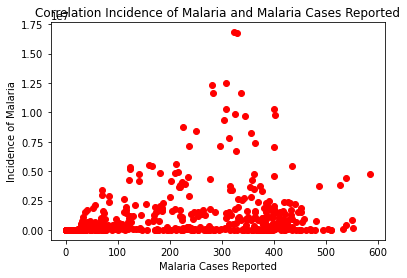

In [25]:
#Scatterplot Incidence of Malaria and Malaria Cases Reported
plt.scatter(x=df['Incidence of malaria (per 1,000 population at risk)'],y=df['Malaria cases reported'],color='red')

plt.title("Correlation Incidence of Malaria and Malaria Cases Reported")
plt.xlabel("Malaria Cases Reported")
plt.ylabel("Incidence of Malaria")
plt.show()


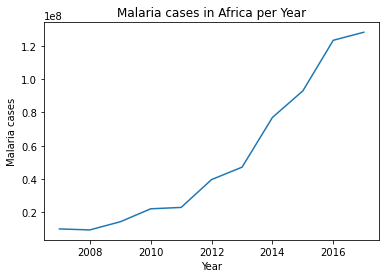

In [26]:
#Trend in cases of Malaria in Africa each year
Malaria = df[['Year','Malaria cases reported']]
Malaria = Malaria.rename(columns={'Malaria cases reported':'Malaria_cases_reported'})
Malaria_cases_yearly = Malaria.groupby(Malaria.Year).Malaria_cases_reported.sum()
Malaria_cases_yearly.reset_index()
Malaria_cases_yearly = Malaria_cases_yearly.to_frame()

#plot over the years
sns.lineplot(data=Malaria_cases_yearly.Malaria_cases_reported)

plt.title("Malaria cases in Africa per Year")
plt.xlabel("Year")
plt.ylabel("Malaria cases")
plt.show()

In [27]:
#count the least missing values per country for the use of insecticide-treated bed net
df['Use of insecticide-treated bed nets (% of under-5 population)'].isnull().groupby(df['Country Name']).sum().sort_values()

Country Name
Senegal                      4
Nigeria                      4
Rwanda                       5
Tanzania                     6
Malawi                       6
Zambia                       6
Sierra Leone                 6
Zimbabwe                     7
Niger                        7
Mozambique                   7
Madagascar                   7
Liberia                      7
Kenya                        7
Guinea                       7
Ghana                        7
Uganda                       7
Togo                         8
Ethiopia                     8
Namibia                      8
Gambia, The                  8
Burundi                      8
Congo, Dem. Rep.             8
Mali                         8
Angola                       8
Sao Tome and Principe        9
Benin                        9
Burkina Faso                 9
Mauritania                   9
Cameroon                     9
South Sudan                  9
Chad                         9
Guinea-Bissau             

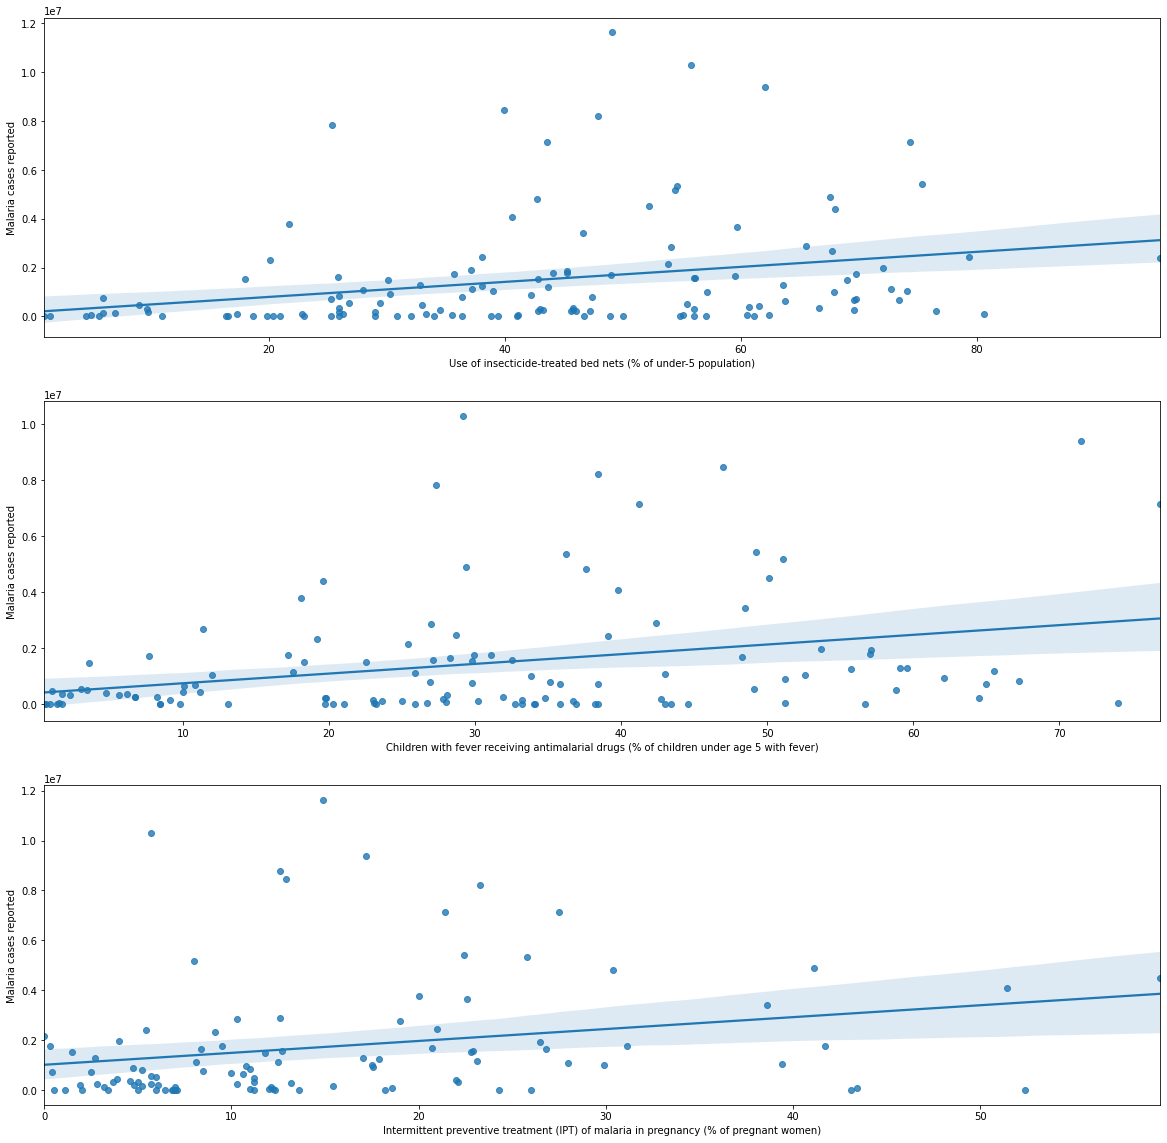

In [28]:
#regplot
#drop missing values first
Malaria_treated_nets = df[df['Use of insecticide-treated bed nets (% of under-5 population)'].notna()]
Malaria_antimalarial_medication = df[df['Children with fever receiving antimalarial drugs (% of children under age 5 with fever)'].notna()]
Malaria_IPT = df[df['Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)'].notna()]

#plotting for malaria cases reported
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,20))

sns.regplot(x=Malaria_treated_nets['Use of insecticide-treated bed nets (% of under-5 population)'],y=Malaria_treated_nets['Malaria cases reported'],data=Malaria_treated_nets,ax=ax1)
sns.regplot(x=Malaria_antimalarial_medication['Children with fever receiving antimalarial drugs (% of children under age 5 with fever)'],y=Malaria_antimalarial_medication['Malaria cases reported'],data=Malaria_antimalarial_medication,ax=ax2)
sns.regplot(x=Malaria_IPT['Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)'],y=Malaria_IPT['Malaria cases reported'],data=Malaria_IPT,ax=ax3)

plt.show()

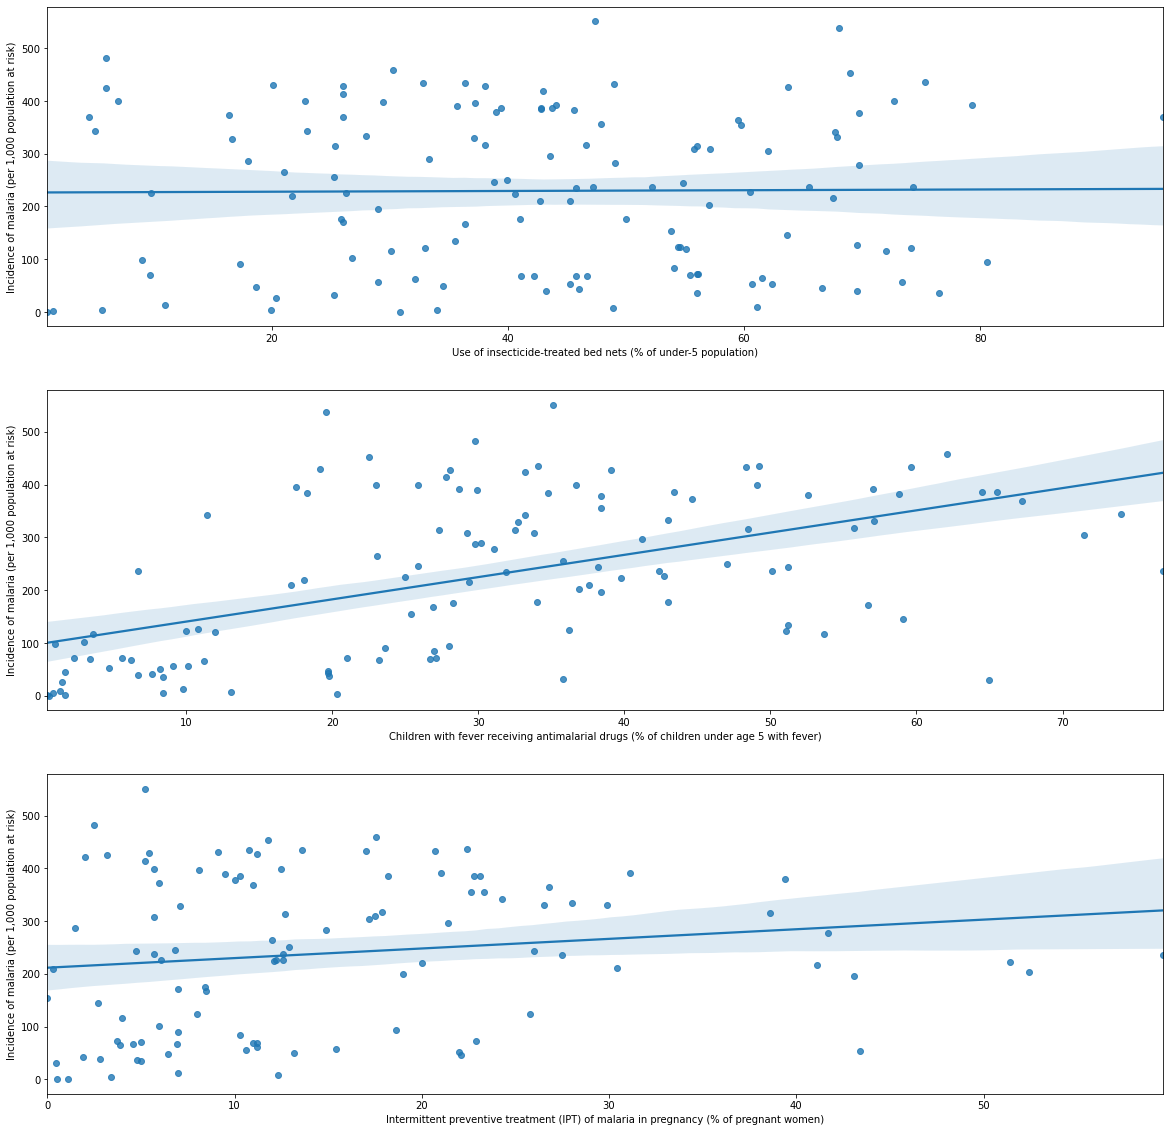

In [29]:
#plotting for malaria incidence risk
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,20))

sns.regplot(x=Malaria_treated_nets['Use of insecticide-treated bed nets (% of under-5 population)'],y=Malaria_treated_nets['Incidence of malaria (per 1,000 population at risk)'],data=Malaria_treated_nets,ax=ax1)
sns.regplot(x=Malaria_antimalarial_medication['Children with fever receiving antimalarial drugs (% of children under age 5 with fever)'],y=Malaria_antimalarial_medication['Incidence of malaria (per 1,000 population at risk)'],data=Malaria_antimalarial_medication,ax=ax2)
sns.regplot(x=Malaria_IPT['Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)'],y=Malaria_IPT['Incidence of malaria (per 1,000 population at risk)'],data=Malaria_IPT,ax=ax3)

plt.show()

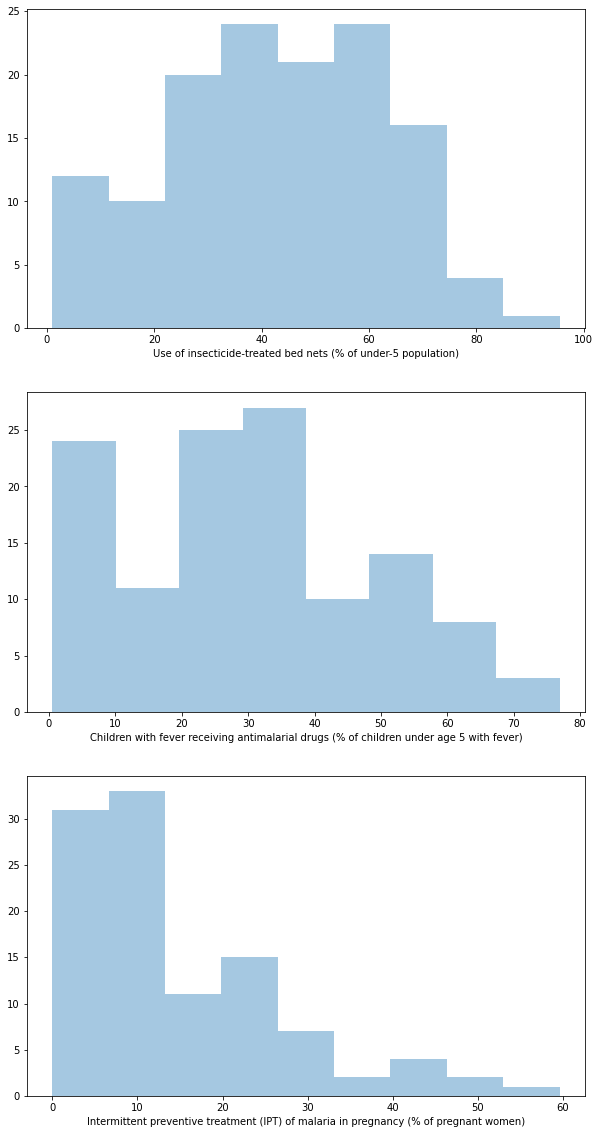

In [30]:
#distribution plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,20))

sns.distplot(Malaria_treated_nets['Use of insecticide-treated bed nets (% of under-5 population)'],kde=False, ax=ax1)
sns.distplot(Malaria_antimalarial_medication['Children with fever receiving antimalarial drugs (% of children under age 5 with fever)'],kde=False,ax=ax2)
sns.distplot(Malaria_IPT['Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)'],kde=False,ax=ax3)

plt.show()